<a href="https://colab.research.google.com/github/shubhankar-mern/MLBasicsLearn/blob/imp/Image_2_sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

In [2]:
import cv2

In [75]:
import os


from google.colab import files


# Save the current working directory
original_directory = os.getcwd()
print(original_directory)


# Specify the target folder
target_folder = 'Trainset'

# Check if the folder exists, and create it if not
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Change the working directory to the newly created directory
print(f"Directory changed  to '{target_folder}'")
os.chdir(target_folder)


# Upload files to the target folder
uploaded = files.upload()
print(f"Files uploaded to '{target_folder}'")

# Change curr dir to before
os.chdir(original_directory)
print(f"Directory changed to '{original_directory}'")

/content
Directory changed  to 'Trainset'


Saving Screenshot 2023-12-11 014600.png to Screenshot 2023-12-11 014600.png
Files uploaded to 'Trainset'
Directory changed to '/content'


In [74]:
## Only if you wanna delete the Trainset
import shutil

# Specify the folder path to be deleted
folder_path = '/content/Trainset'

# Use shutil.rmtree to delete the folder and its contents
shutil.rmtree(folder_path)

print(f"Folder '{folder_path}' and its contents have been deleted.")

Folder '/content/Trainset' and its contents have been deleted.


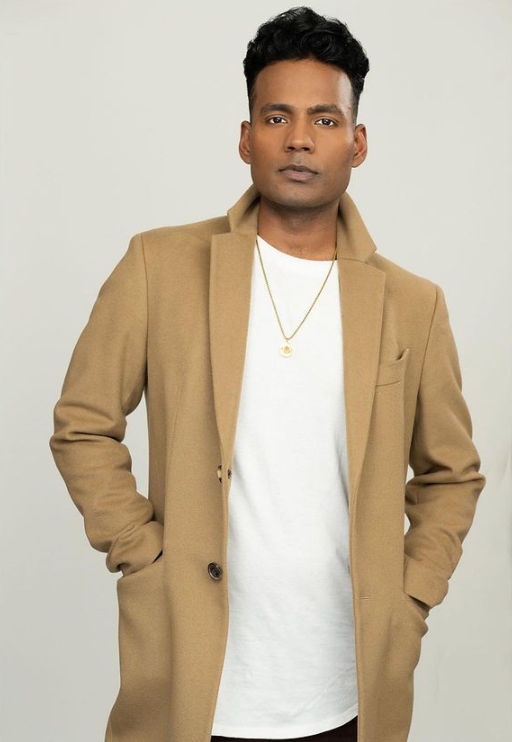

/content


In [76]:
## Lets display the images
from IPython.display import Image, display



# Specify the directory name
dir_name = 'Trainset'

# List the contents of the directory
dir_contents = os.listdir(dir_name)


# Display each image in the notebook
for i,image_file in enumerate(dir_contents):
      image_path = os.path.join(dir_name, image_file)
      display(Image(filename=image_path))

# Save the current working directory
org_directory = os.getcwd()
print(org_directory)

In [61]:
def sketcher(image_path):
  image = cv2.imread(image_path)
  grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  invert =  cv2.bitwise_not(grey_image)
  blur = cv2.GaussianBlur(invert, (111,111),0)
  invertedblur = cv2.bitwise_not(blur)
  sketch = cv2.divide(grey_image, invertedblur, scale=256.0)
  cv2.imwrite(image_path, sketch)

In [62]:
import cv2
import numpy as np

def convert_to_binary_silhouette(image_path):

    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to create a binary image
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    # Invert the binary image to have white edges on a black background
    inverted_binary_image = cv2.bitwise_not(binary_image)

    cv2.imwrite(image_path, inverted_binary_image)


In [63]:
import cv2
import numpy as np

def extract_white_edges(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to create a binary image
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a black background
    result = np.zeros_like(image)

    # Draw white contours on the black background
    cv2.drawContours(result, contours, -1, (255, 255, 255), thickness=1)

    cv2.imwrite(image_path, result)

In [64]:
import cv2

def extract_white_edges_with_canny(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, 100, 200)  # Adjust the threshold values as needed

    cv2.imwrite(image_path, edges)

In [65]:
import cv2
import numpy as np

def sobel_edge_detection(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Sobel operator to calculate gradients in the x and y directions
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate the magnitude of the gradient
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Convert the gradient magnitude to a suitable range (0-255)
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convert the gradient magnitude to an 8-bit unsigned integer
    gradient_magnitude = np.uint8(gradient_magnitude)

    cv2.imwrite(image_path, gradient_magnitude)

In [71]:
import cv2
import numpy as np

def sobel_edge_detection_rgb(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Split the image into its color channels
    b, g, r = cv2.split(image)

    # Apply the Sobel operator to each color channel
    sobel_x_r = cv2.Sobel(r, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y_r = cv2.Sobel(r, cv2.CV_64F, 0, 1, ksize=3)
    sobel_x_g = cv2.Sobel(g, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y_g = cv2.Sobel(g, cv2.CV_64F, 0, 1, ksize=3)
    sobel_x_b = cv2.Sobel(b, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y_b = cv2.Sobel(b, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate the gradient magnitude for each channel
    gradient_magnitude_r = np.sqrt(sobel_x_r**2 + sobel_y_r**2)
    gradient_magnitude_g = np.sqrt(sobel_x_g**2 + sobel_y_g**2)
    gradient_magnitude_b = np.sqrt(sobel_x_b**2 + sobel_y_b**2)

    # Merge the gradient magnitude channels back into a color image
    gradient_magnitude_image = cv2.merge((gradient_magnitude_b, gradient_magnitude_g, gradient_magnitude_r))

    # Convert the gradient magnitude image to an 8-bit unsigned integer image
    gradient_magnitude_image = np.uint8(gradient_magnitude_image)

    cv2.imwrite(image_path, gradient_magnitude_image)

In [77]:
import cv2
import numpy as np

def prewitt_edge_detection_rgb(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Split the image into its color channels
    b, g, r = cv2.split(image)

    # Apply the Prewitt operator to each color channel
    prewitt_x_r = cv2.Sobel(r, cv2.CV_64F, 1, 0, ksize=3)
    prewitt_y_r = cv2.Sobel(r, cv2.CV_64F, 0, 1, ksize=3)
    prewitt_x_g = cv2.Sobel(g, cv2.CV_64F, 1, 0, ksize=3)
    prewitt_y_g = cv2.Sobel(g, cv2.CV_64F, 0, 1, ksize=3)
    prewitt_x_b = cv2.Sobel(b, cv2.CV_64F, 1, 0, ksize=3)
    prewitt_y_b = cv2.Sobel(b, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate the gradient magnitude for each channel
    gradient_magnitude_r = np.sqrt(prewitt_x_r**2 + prewitt_y_r**2)
    gradient_magnitude_g = np.sqrt(prewitt_x_g**2 + prewitt_y_g**2)
    gradient_magnitude_b = np.sqrt(prewitt_x_b**2 + prewitt_y_b**2)

    # Merge the gradient magnitude channels back into a color image
    gradient_magnitude_image = cv2.merge((gradient_magnitude_b, gradient_magnitude_g, gradient_magnitude_r))

    # Convert the gradient magnitude image to an 8-bit unsigned integer image
    gradient_magnitude_image = np.uint8(gradient_magnitude_image)

    cv2.imwrite(image_path, gradient_magnitude_image)

In [78]:
from posixpath import dirname
import os
# Specify the directory name
os.chdir('/content')
dir_name = 'Trainset'

# List the contents of the directory
dir_contents = os.listdir(dir_name)

print(dir_contents)

for image_file in dir_contents:
    image_path = os.path.join(dir_name, image_file)
    print('image_>path before cropped: ',image_path)
    #sketcher(image_path)
    #convert_to_binary_silhouette(image_path)
    #extract_white_edges(image_path)
    #extract_white_edges_with_canny(image_path)
    #sobel_edge_detection(image_path)
    #sobel_edge_detection_rgb(image_path)
    prewitt_edge_detection_rgb(image_path)


['Screenshot 2023-12-11 014600.png']
image_>path before cropped:  Trainset/Screenshot 2023-12-11 014600.png


image_>path after cropped:  Trainset/Screenshot 2023-12-11 014600.png


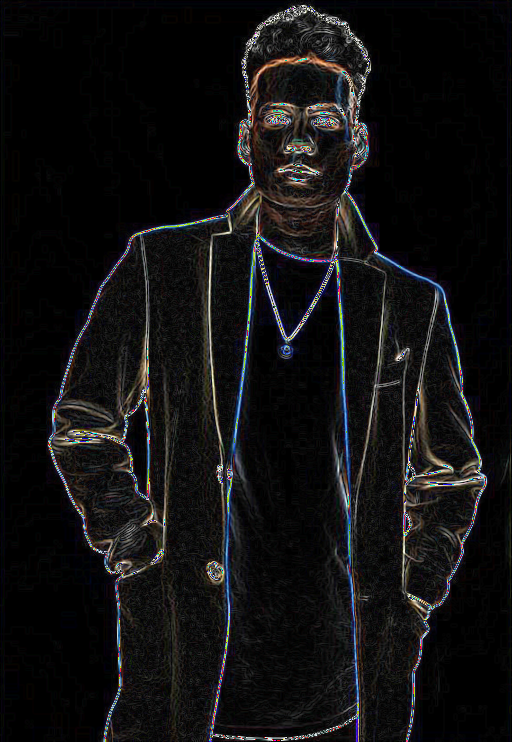

In [79]:

from IPython.display import Image, display
# Display each cropped face in the notebook
for image_file in dir_contents:
    image_path = os.path.join(dir_name, image_file)
    print('image_>path after cropped: ',image_path)
    display(Image(filename=image_path))